# Import Data

In [9]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from prettytable import PrettyTable as pt
from numpy import mean
from numpy import std
from numpy import absolute
sns.set(style="darkgrid")
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [10]:
import warnings 
warnings.filterwarnings('ignore')

# Data PreProcess + Concatination

## Data Concatination

In [11]:
df = pd.concat(map(pd.read_csv,glob.glob('./datasets/*.csv')))
display(df)

,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,21.0,19.62,56.06,22.77,24.36,58.82
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,21.0,13.36,38.17,24.14,24.36,36.88
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,21.0,11.13,31.80,29.64,24.36,25.99
3,pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,21.0,16.25,46.43,25.82,24.36,44.35
4,pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,21.0,15.87,45.34,28.18,24.36,37.33
...,...,...,...,...,...,...,...,...,...
77,sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...,21.0,20.29,57.97,22.03,23.02,56.04
78,sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...,21.0,14.47,41.34,20.79,21.11,45.71
79,sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...,21.0,15.55,44.43,17.91,21.11,55.19
80,sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...,21.0,17.43,49.80,23.41,21.11,52.63


In [12]:
dataShape = df.shape
numOfNanRows = df.isnull().sum().sum()
print(f'Shape DataFrame sebelum data NaN dihapus: {dataShape}')
print(f'Jumlah baris yang NaN adalah sebanyak {numOfNanRows} baris')
# Drop nan rows in dataframe
text = ' AFTER DROPPING NAN VALUES '
print(f'\n{text:-^50}\n')
df.dropna(inplace = True)

dataShape = df.shape
numOfNanRows = df.isnull().sum().sum()
print(f'Shape DataFrame stelah data NaN dihapus: {dataShape}')
print(f'Jumlah baris yang NaN adalah sebanyak {numOfNanRows} baris')

Shape DataFrame sebelum data NaN dihapus: (986, 9)
Jumlah baris yang NaN adalah sebanyak 59 baris

----------- AFTER DROPPING NAN VALUES ------------

Shape DataFrame stelah data NaN dihapus: (943, 9)
Jumlah baris yang NaN adalah sebanyak 0 baris


# Nomor 1

In [13]:
numericDfIndex = [i for i in range(len(df.dtypes)) if df.dtypes[i] == 'float64']
numericDf = df.iloc[:,numericDfIndex]
display(numericDf)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,21.0,19.62,56.06,22.77,24.36,58.82
1,21.0,13.36,38.17,24.14,24.36,36.88
2,21.0,11.13,31.80,29.64,24.36,25.99
3,21.0,16.25,46.43,25.82,24.36,44.35
4,21.0,15.87,45.34,28.18,24.36,37.33
...,...,...,...,...,...,...
77,21.0,20.29,57.97,22.03,23.02,56.04
78,21.0,14.47,41.34,20.79,21.11,45.71
79,21.0,15.55,44.43,17.91,21.11,55.19
80,21.0,17.43,49.80,23.41,21.11,52.63


In [14]:
numericDf.isnull().sum().sum()

0

In [15]:
model = LinearRegression()

In [16]:
def crossValMAE(model:object,df_param,random_state=42):
    X = df_param.drop(['pencapaian_kecepatan'],axis=1)
    y = df_param['pencapaian_kecepatan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    folds = KFold(n_splits = 10, shuffle = True, random_state = random_state)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=folds,n_jobs=-1)
    meanScores = round(mean(absolute(scores)),3)
    meanStd = round(scores.std(),3)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    mae = round(mean_absolute_error(y_test,y_hat),3)
    return meanScores,meanStd,mae

def displayCrossValResults(maeMean,maeStd,mae,optional_param = None):
    if optional_param is None:
        print(f'Cross Val MAE Mean = {maeMean}')
        print(f'Cross Val MAE Std = {maeStd}')
        print(f'Non Cross Val MAE = {mae}')
    else:
        print(f'Cross Val MAE Mean after {optional_param} = {maeMean}')
        print(f'Cross Val MAE Std after {optional_param} = {maeStd}')
        print(f'Non Cross Val MAE after {optional_param} = {mae}')

In [17]:
maeMean,maeStd,mae = crossValMAE(model,numericDf)
displayCrossValResults(maeMean,maeStd,mae)

Cross Val MAE Mean = 2.021
Cross Val MAE Std = 0.147
Non Cross Val MAE = 2.064


# Nomor 2

In [18]:
numericDfCols = numericDf.columns
maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy = [],[],[]
def appendAccuracy(maeMean,maeStd,nonCrossVal):
    maeMeanAccuracy.append(maeMean)
    maeStdAccuracy.append(maeStd)
    nonCrossValAccuracy.append(nonCrossVal)

## Normalisasi Standarisasi dan Robust Scaler

### Normalisasi

In [19]:
scalerNormal = MinMaxScaler()
numericDfNormal = pd.DataFrame(scalerNormal.fit_transform(numericDf))
numericDfNormal.columns = numericDfCols
display(numericDfNormal)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,0.4,0.875392,0.761832,0.226399,0.348718,0.651410
1,0.4,0.384796,0.371647,0.265122,0.348718,0.335636
2,0.4,0.210031,0.232715,0.420577,0.348718,0.178900
3,0.4,0.611285,0.551799,0.312606,0.348718,0.443149
4,0.4,0.581505,0.528026,0.379310,0.348718,0.342113
...,...,...,...,...,...,...
938,0.4,0.927900,0.803490,0.205483,0.286247,0.611399
939,0.4,0.471787,0.440785,0.170435,0.197203,0.462723
940,0.4,0.556426,0.508179,0.089033,0.197203,0.599165
941,0.4,0.703762,0.625300,0.244488,0.197203,0.562320


### Normalisasi Histogram

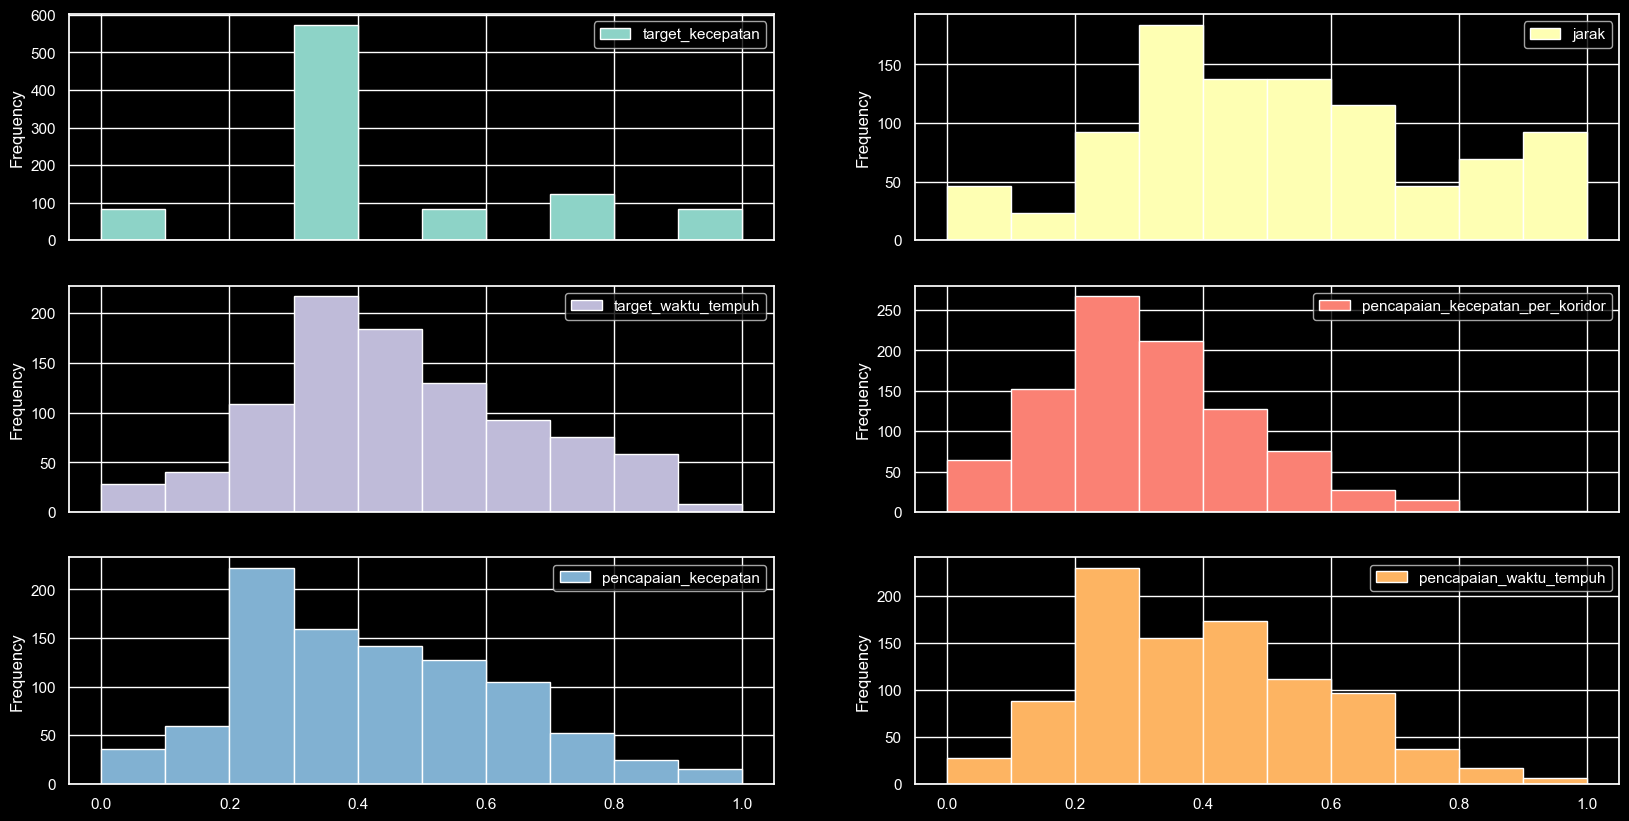

In [20]:
numericDfNormal.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

### Standarisasi

In [21]:
scalerStd = StandardScaler()
numericDfStandard = pd.DataFrame(scalerStd.fit_transform(numericDf))
numericDfStandard.columns = numericDfCols
display(numericDfStandard)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,-0.232624,1.511478,1.513242,-0.575184,-0.364007,1.335042
1,-0.232624,-0.549380,-0.480680,-0.325759,-0.364007,-0.345691
2,-0.232624,-1.283520,-1.190646,0.675581,-0.364007,-1.179928
3,-0.232624,0.402038,0.439935,-0.019896,-0.364007,0.226555
4,-0.232624,0.276938,0.318449,0.409770,-0.364007,-0.311218
...,...,...,...,...,...,...
938,-0.232624,1.732049,1.726121,-0.709910,-0.674716,1.122077
939,-0.232624,-0.183956,-0.127369,-0.935667,-1.117592,0.330739
940,-0.232624,0.171591,0.217026,-1.460005,-1.117592,1.056962
941,-0.232624,0.790507,0.815537,-0.458665,-1.117592,0.860852


### Standarisasi Histogram

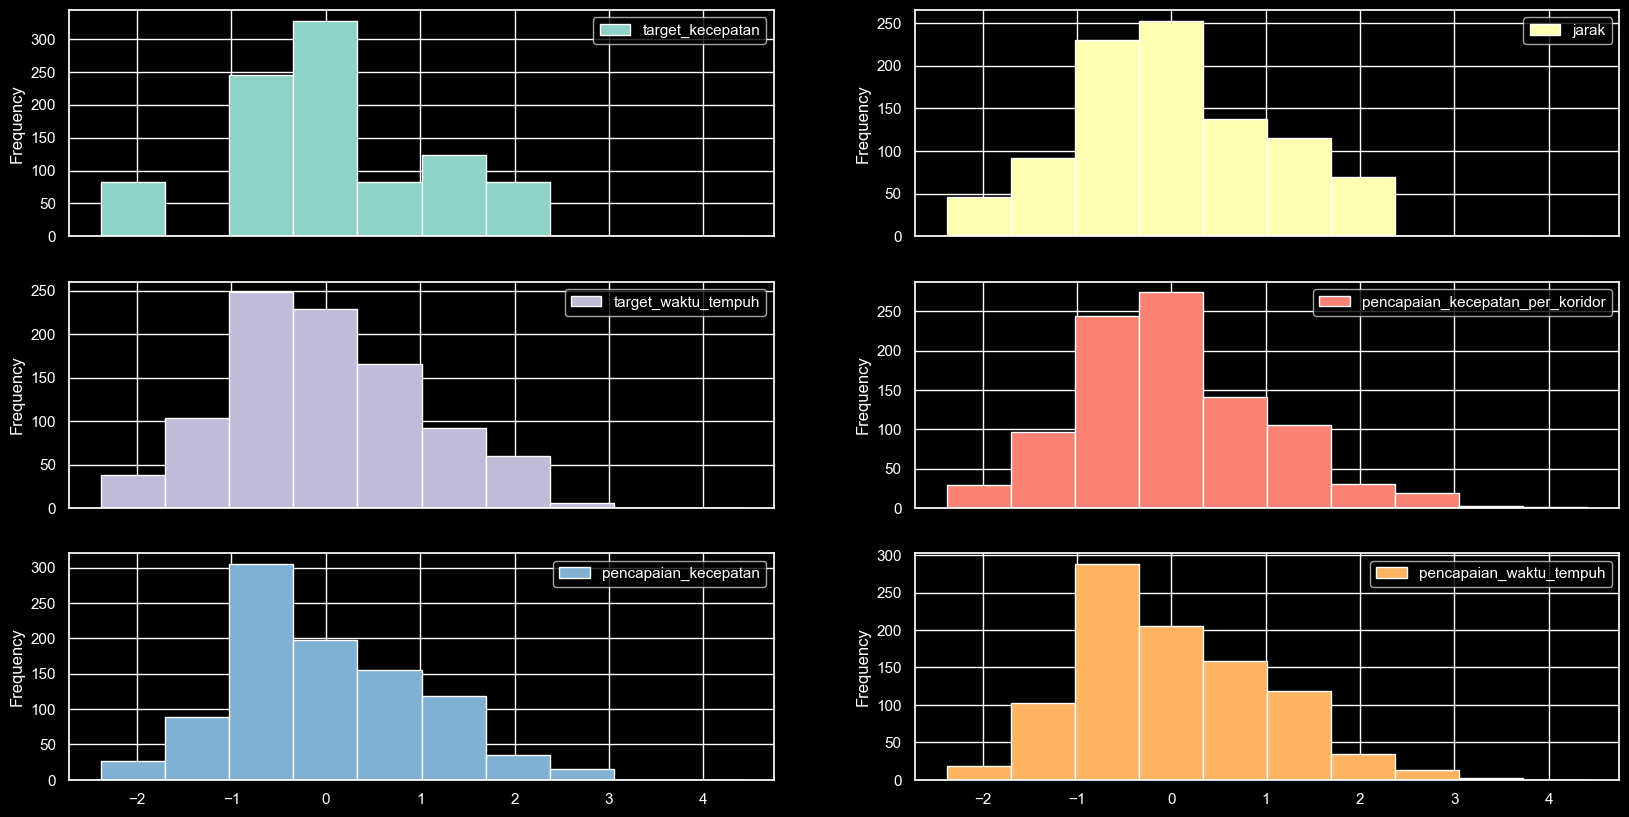

In [22]:
numericDfStandard.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

### Robust Scaler

In [23]:
scalerRobust = RobustScaler()
numericDfRobust = pd.DataFrame(scalerRobust.fit_transform(numericDf))
numericDfRobust.columns = numericDfCols
display(numericDfRobust)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,0.0,1.262755,1.271339,-0.343593,-0.151492,0.994661
1,0.0,-0.334184,-0.336029,-0.147459,-0.151492,-0.176722
2,0.0,-0.903061,-0.908356,0.639943,-0.151492,-0.758142
3,0.0,0.403061,0.406110,0.093057,-0.151492,0.222104
4,0.0,0.306122,0.308176,0.430923,-0.151492,-0.152696
...,...,...,...,...,...,...
938,0.0,1.433673,1.442947,-0.449535,-0.356542,0.846236
939,0.0,-0.051020,-0.051213,-0.627058,-0.648814,0.294714
940,0.0,0.224490,0.226415,-1.039370,-0.648814,0.800854
941,0.0,0.704082,0.708895,-0.251969,-0.648814,0.664175


### Robust Histogram

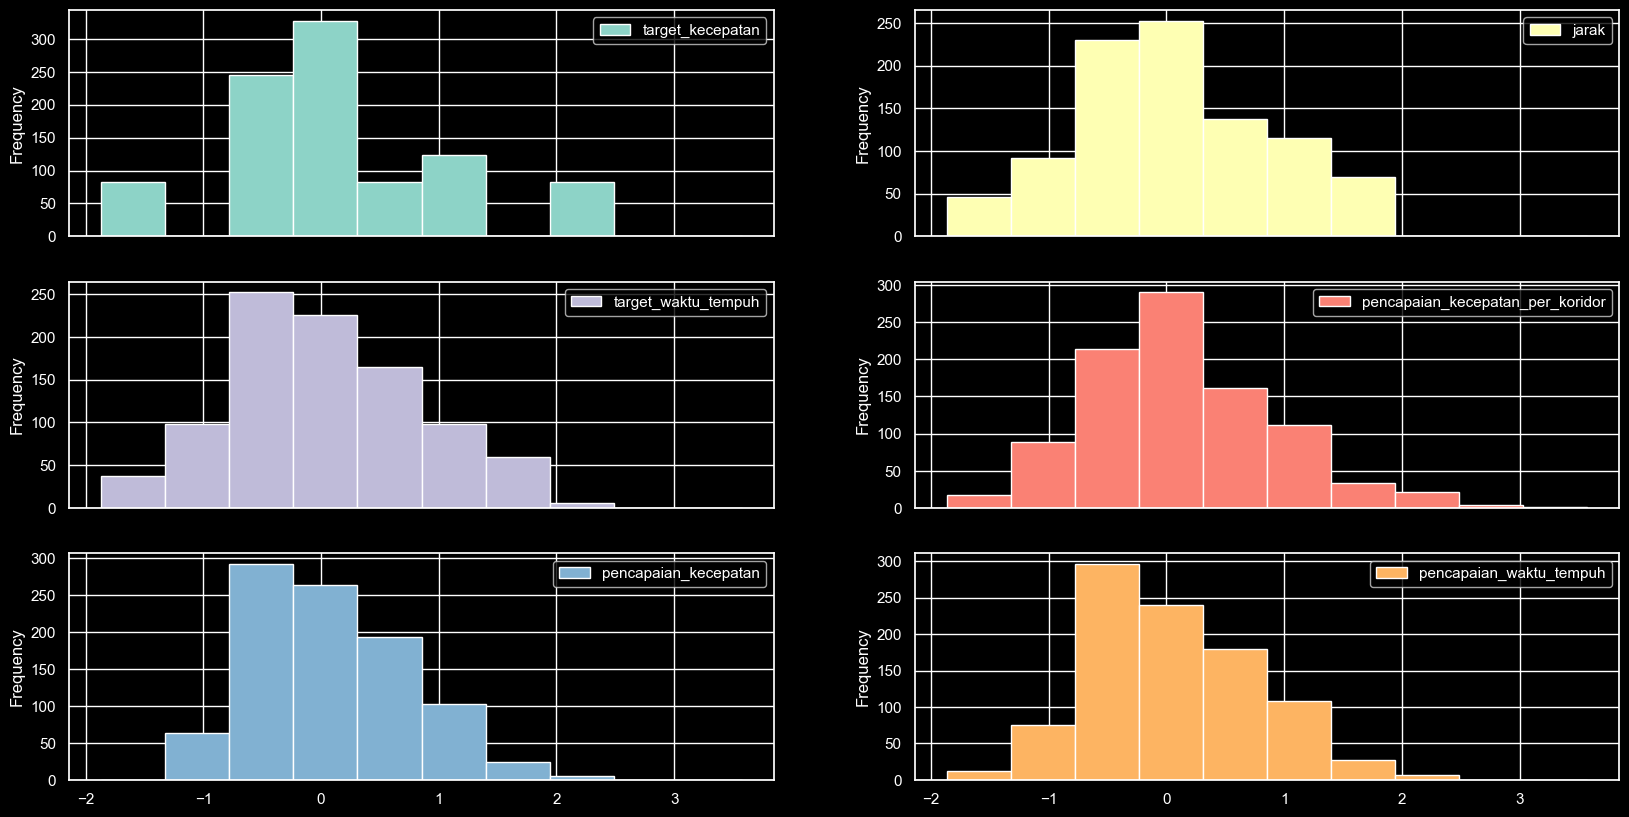

In [24]:
numericDfRobust.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

## Akurasi Model Setiap Metode Transformasi

### Akurasi Normalisasi

In [25]:
meanMaeNormal,stdMaeNormal,maeNormal = crossValMAE(model,numericDfNormal)
displayCrossValResults(meanMaeNormal,stdMaeNormal,maeNormal,'normalization')
appendAccuracy(meanMaeNormal,stdMaeNormal,maeNormal)

Cross Val MAE Mean after normalization = 0.094
Cross Val MAE Std after normalization = 0.007
Non Cross Val MAE after normalization = 0.096


### Akurasi Standarisasi

In [26]:
meanMaeStandard,stdMaeStandard,maeStandard = crossValMAE(model,numericDfStandard)
displayCrossValResults(meanMaeStandard,stdMaeStandard,maeStandard,'standarization')
appendAccuracy(meanMaeStandard,stdMaeStandard,maeStandard)

Cross Val MAE Mean after standarization = 0.469
Cross Val MAE Std after standarization = 0.034
Non Cross Val MAE after standarization = 0.479


### Akurasi Robust Scaler

In [27]:
meanMaeRobust,stdMaeRobust,maeRobust = crossValMAE(model,numericDfRobust)
displayCrossValResults(meanMaeRobust,stdMaeRobust,maeRobust,'robust')
appendAccuracy(meanMaeRobust,stdMaeRobust,maeRobust)

Cross Val MAE Mean after robust = 0.309
Cross Val MAE Std after robust = 0.023
Non Cross Val MAE after robust = 0.316


## Tabel Akurasi

In [28]:
def makeTable(maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy,transformations,title):
    comparisonTable = pt()
    comparisonTable.title = title
    comparisonTable.field_names = ["No","Metode Transformasi","Cross Val MAE Mean","Cross Val MAE Std","Non Cross Val MAE"]
    n = len(maeMeanAccuracy)
    for i in range(n): comparisonTable.add_row((i+1,transformations[i],maeMeanAccuracy[i],maeStdAccuracy[i],nonCrossValAccuracy[i]))
    return comparisonTable

In [29]:
transformations = ['Normalization','Standarization','Robust']
title = 'Tabel Komparasi Akurasi Normalisasi, Standarisasi, dan Robust'
tabel = makeTable(maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy,transformations,title)
print(tabel)

+---------------------------------------------------------------------------------------+
|             Tabel Komparasi Akurasi Normalisasi, Standarisasi, dan Robust             |
+----+---------------------+--------------------+-------------------+-------------------+
| No | Metode Transformasi | Cross Val MAE Mean | Cross Val MAE Std | Non Cross Val MAE |
+----+---------------------+--------------------+-------------------+-------------------+
| 1  |    Normalization    |       0.094        |       0.007       |       0.096       |
| 2  |    Standarization   |       0.469        |       0.034       |       0.479       |
| 3  |        Robust       |       0.309        |       0.023       |       0.316       |
+----+---------------------+--------------------+-------------------+-------------------+


# Nomor 3

In [30]:
categoricalDfIndex = [i for i in range(len(df.dtypes)) if df.dtypes[i] == 'object']
categoricalDf = df.iloc[:,categoricalDfIndex]
categoricalDf['pencapaian_kecepatan'] = df['pencapaian_kecepatan']
display(categoricalDf)

,waktu,arah,koridor,pencapaian_kecepatan
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,24.36
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,24.36
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,24.36
3,pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,24.36
4,pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,24.36
...,...,...,...,...
77,sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...,23.02
78,sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...,21.11
79,sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...,21.11
80,sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...,21.11


In [31]:
categoricalDf.isnull().sum()

waktu                   0
arah                    0
koridor                 0
pencapaian_kecepatan    0
dtype: int64

In [32]:
X = categoricalDf.drop(['pencapaian_kecepatan'],axis=1)
y = categoricalDf['pencapaian_kecepatan']

## One Hot Encoder

In [33]:
def displayDfAfterOneHot(df):
    text = ' DataFrame After One Hot Encoding '
    print(f'{text:-^90}')
    display(df)

In [34]:
oneHotEncoder = OneHotEncoder(sparse=False)
categoricalDfOneHotX = pd.DataFrame(oneHotEncoder.fit_transform(X))
y.reset_index(drop=True,inplace=True)
categoricalDfOneHot = pd.concat([categoricalDfOneHotX,y],axis=1)
display(categoricalDfOneHot)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,pencapaian_kecepatan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.02
939,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.11
940,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.11
941,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.11


## Akurasi Model

In [35]:
def crossValMAEEncoding(model:object,df_param,random_state=42):
    X = df_param.iloc[:,:-1]
    y = df_param.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    folds = KFold(n_splits = 10, shuffle = True, random_state = random_state)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=folds,n_jobs=-1)
    meanScores = round(mean(absolute(scores)),3)
    meanStd = round(scores.std(),3)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    mae = round(mean_absolute_error(y_test,y_hat),3)
    return meanScores,meanStd,mae

In [36]:
maeMeanAccuracyEncoding,maeStdAccuracyEncoding, nonCrossValAccuracyEncoding = [],[],[]
def appendAccuracyEncoding(maeMean,maeStd,nonCrossVal):
    maeMeanAccuracyEncoding.append(maeMean)
    maeStdAccuracyEncoding.append(maeStd)
    nonCrossValAccuracyEncoding.append(nonCrossVal)

### Akurasi Model setelah di One Hot Encoding (Categorical Data Only) 

In [37]:
meanMaeCategoryOneHot,stdMaeCategoryOneHot,maeCategoryOneHot = crossValMAEEncoding(model,categoricalDfOneHot)
appendAccuracyEncoding(meanMaeCategoryOneHot,stdMaeCategoryOneHot,maeCategoryOneHot)
displayCrossValResults(meanMaeCategoryOneHot,stdMaeCategoryOneHot,maeCategoryOneHot)

Cross Val MAE Mean = 3.063
Cross Val MAE Std = 0.235
Non Cross Val MAE = 3.221


## Ordinal Encoder

In [38]:
def displayDfAfterOrdinal(df):
    text = ' DataFrame After Ordinal Encoding '
    print(f'{text:-^90}')
    display(df)

In [39]:
ordinalEncoder = OrdinalEncoder()
categoricalDfOrdinalX = pd.DataFrame(ordinalEncoder.fit_transform(X))
categoricalDfOrdinal = pd.concat([categoricalDfOrdinalX,y],axis=1)
displayDfAfterOrdinal(categoricalDfOrdinal)

---------------------------- DataFrame After Ordinal Encoding ----------------------------


,0,1,2,pencapaian_kecepatan
0,2.0,5.0,16.0,24.36
1,2.0,5.0,0.0,24.36
2,2.0,5.0,25.0,24.36
3,2.0,5.0,29.0,24.36
4,2.0,5.0,26.0,24.36
...,...,...,...,...
938,3.0,4.0,17.0,23.02
939,3.0,1.0,5.0,21.11
940,3.0,1.0,4.0,21.11
941,3.0,1.0,13.0,21.11


### Akurasi Model setelah di Ordinal Encoding (Categorical Data Only) 

In [40]:
meanMaeCategoryOrdinal,stdMaeCategoryOrdinal,maeCategoryOrdinal = crossValMAEEncoding(model,categoricalDfOrdinal)
appendAccuracyEncoding(meanMaeCategoryOrdinal,stdMaeCategoryOrdinal,maeCategoryOrdinal)
displayCrossValResults(meanMaeCategoryOrdinal,stdMaeCategoryOrdinal,maeCategoryOrdinal)

Cross Val MAE Mean = 3.345
Cross Val MAE Std = 0.163
Non Cross Val MAE = 3.457


## Tabel Perbandingan Akurasi Metode Encoding

In [41]:
transformations = ['One Hot','Ordinal']
title = 'Tabel Komparasi Akurasi One Hot Encoding Vs. Ordinal Encoding'
tabel = makeTable(maeMeanAccuracyEncoding,maeStdAccuracyEncoding,nonCrossValAccuracyEncoding,transformations,title)
print(tabel)

+---------------------------------------------------------------------------------------+
|             Tabel Komparasi Akurasi One Hot Encoding Vs. Ordinal Encoding             |
+----+---------------------+--------------------+-------------------+-------------------+
| No | Metode Transformasi | Cross Val MAE Mean | Cross Val MAE Std | Non Cross Val MAE |
+----+---------------------+--------------------+-------------------+-------------------+
| 1  |       One Hot       |       3.063        |       0.235       |       3.221       |
| 2  |       Ordinal       |       3.345        |       0.163       |       3.457       |
+----+---------------------+--------------------+-------------------+-------------------+


# Nomor 4

## Normalisasi + One Hot Encoding

In [42]:
numericDfNormal.drop(['pencapaian_kecepatan'],axis=1,inplace=True)
normalOneHot = pd.concat([categoricalDfOneHot,numericDfNormal],axis=1)
display(normalOneHot)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.875392,0.761832,0.226399,0.651410
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.384796,0.371647,0.265122,0.335636
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.210031,0.232715,0.420577,0.178900
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.611285,0.551799,0.312606,0.443149
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.581505,0.528026,0.379310,0.342113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,23.02,0.4,0.927900,0.803490,0.205483,0.611399
939,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.4,0.471787,0.440785,0.170435,0.462723
940,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.4,0.556426,0.508179,0.089033,0.599165
941,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.4,0.703762,0.625300,0.244488,0.562320


### Akurasi Normalisasi + One Hot Encoding

In [43]:
maeMeanNormalOneHot,maeStdNormalOneHot,maeNormalOneHot = crossValMAE(model,normalOneHot)
displayCrossValResults(maeMeanNormalOneHot,maeStdNormalOneHot,maeNormalOneHot)

Cross Val MAE Mean = 1.358
Cross Val MAE Std = 0.132
Non Cross Val MAE = 1.279


## Normalisasi + Ordinal Encoding

In [44]:
normalOrdinal = pd.concat([categoricalDfOrdinal,numericDfNormal],axis=1)
display(normalOrdinal)

,0,1,2,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,2.0,5.0,16.0,24.36,0.4,0.875392,0.761832,0.226399,0.651410
1,2.0,5.0,0.0,24.36,0.4,0.384796,0.371647,0.265122,0.335636
2,2.0,5.0,25.0,24.36,0.4,0.210031,0.232715,0.420577,0.178900
3,2.0,5.0,29.0,24.36,0.4,0.611285,0.551799,0.312606,0.443149
4,2.0,5.0,26.0,24.36,0.4,0.581505,0.528026,0.379310,0.342113
...,...,...,...,...,...,...,...,...,...
938,3.0,4.0,17.0,23.02,0.4,0.927900,0.803490,0.205483,0.611399
939,3.0,1.0,5.0,21.11,0.4,0.471787,0.440785,0.170435,0.462723
940,3.0,1.0,4.0,21.11,0.4,0.556426,0.508179,0.089033,0.599165
941,3.0,1.0,13.0,21.11,0.4,0.703762,0.625300,0.244488,0.562320


### Akurasi Normalisasi + Ordinal Encoding

In [45]:
maeMeanNormalOrdinal,maeStdNormalOrdinal,maeNormalOrdinal = crossValMAE(model,normalOrdinal)
displayCrossValResults(maeMeanNormalOrdinal,maeStdNormalOrdinal,maeNormalOrdinal)

Cross Val MAE Mean = 1.938
Cross Val MAE Std = 0.128
Non Cross Val MAE = 1.889


## Standarisasi + One Hot Encoding

In [46]:
numericDfStandard.drop(['pencapaian_kecepatan'],axis=1,inplace=True)
standardOneHot = pd.concat([categoricalDfOneHot,numericDfStandard],axis=1)
display(standardOneHot)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,1.511478,1.513242,-0.575184,1.335042
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,-1.283520,-1.190646,0.675581,-1.179928
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,0.402038,0.439935,-0.019896,0.226555
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,0.276938,0.318449,0.409770,-0.311218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,23.02,-0.232624,1.732049,1.726121,-0.709910,1.122077
939,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,-0.232624,-0.183956,-0.127369,-0.935667,0.330739
940,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,-0.232624,0.171591,0.217026,-1.460005,1.056962
941,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,-0.232624,0.790507,0.815537,-0.458665,0.860852


### Akurasi Standarisasi + One Hot Encoding

In [47]:
maeMeanStandardOneHot,maeStdStandardOneHot,maeStandardOneHot = crossValMAE(model,standardOneHot)
displayCrossValResults(maeMeanStandardOneHot,maeStdStandardOneHot,maeStandardOneHot)

Cross Val MAE Mean = 1.322
Cross Val MAE Std = 0.121
Non Cross Val MAE = 1.281


## Standarisasi + Ordinal Encoding

In [48]:
standardOrdinal = pd.concat([categoricalDfOrdinal,numericDfStandard],axis=1)
display(standardOrdinal)

,0,1,2,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,2.0,5.0,16.0,24.36,-0.232624,1.511478,1.513242,-0.575184,1.335042
1,2.0,5.0,0.0,24.36,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691
2,2.0,5.0,25.0,24.36,-0.232624,-1.283520,-1.190646,0.675581,-1.179928
3,2.0,5.0,29.0,24.36,-0.232624,0.402038,0.439935,-0.019896,0.226555
4,2.0,5.0,26.0,24.36,-0.232624,0.276938,0.318449,0.409770,-0.311218
...,...,...,...,...,...,...,...,...,...
938,3.0,4.0,17.0,23.02,-0.232624,1.732049,1.726121,-0.709910,1.122077
939,3.0,1.0,5.0,21.11,-0.232624,-0.183956,-0.127369,-0.935667,0.330739
940,3.0,1.0,4.0,21.11,-0.232624,0.171591,0.217026,-1.460005,1.056962
941,3.0,1.0,13.0,21.11,-0.232624,0.790507,0.815537,-0.458665,0.860852


### Akurasi Standarisasi + Ordinal Encoding

In [49]:
maeMeanStandardOrdinal,maeStdStandardOrdinal,maeStandardOrdinal = crossValMAE(model,standardOrdinal)
displayCrossValResults(maeMeanStandardOrdinal,maeStdStandardOrdinal,maeStandardOrdinal)

Cross Val MAE Mean = 1.938
Cross Val MAE Std = 0.128
Non Cross Val MAE = 1.889


## Robust Scaler + One Hot Encoding

In [50]:
numericDfRobust.drop(['pencapaian_kecepatan'],axis=1,inplace=True)
robustOneHot = pd.concat([categoricalDfOneHot,numericDfRobust],axis=1)
display(robustOneHot)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.0,1.262755,1.271339,-0.343593,0.994661
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.0,-0.334184,-0.336029,-0.147459,-0.176722
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.0,-0.903061,-0.908356,0.639943,-0.758142
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.0,0.403061,0.406110,0.093057,0.222104
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,24.36,0.0,0.306122,0.308176,0.430923,-0.152696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,23.02,0.0,1.433673,1.442947,-0.449535,0.846236
939,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.0,-0.051020,-0.051213,-0.627058,0.294714
940,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.0,0.224490,0.226415,-1.039370,0.800854
941,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.0,0.704082,0.708895,-0.251969,0.664175


### Akurasi Robust + One Hot Encoding

In [51]:
maeMeanRobustOneHot,maeStdRobustOneHot,maeRobustOneHot = crossValMAE(model,robustOneHot)
displayCrossValResults(maeMeanRobustOneHot,maeStdRobustOneHot,maeRobustOneHot)

Cross Val MAE Mean = 1.332
Cross Val MAE Std = 0.12
Non Cross Val MAE = 1.286


## Robust Scaler + Ordinal Encoding

In [52]:
robustOrdinal = pd.concat([categoricalDfOrdinal,numericDfRobust],axis=1)
display(robustOrdinal)

,0,1,2,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,2.0,5.0,16.0,24.36,0.0,1.262755,1.271339,-0.343593,0.994661
1,2.0,5.0,0.0,24.36,0.0,-0.334184,-0.336029,-0.147459,-0.176722
2,2.0,5.0,25.0,24.36,0.0,-0.903061,-0.908356,0.639943,-0.758142
3,2.0,5.0,29.0,24.36,0.0,0.403061,0.406110,0.093057,0.222104
4,2.0,5.0,26.0,24.36,0.0,0.306122,0.308176,0.430923,-0.152696
...,...,...,...,...,...,...,...,...,...
938,3.0,4.0,17.0,23.02,0.0,1.433673,1.442947,-0.449535,0.846236
939,3.0,1.0,5.0,21.11,0.0,-0.051020,-0.051213,-0.627058,0.294714
940,3.0,1.0,4.0,21.11,0.0,0.224490,0.226415,-1.039370,0.800854
941,3.0,1.0,13.0,21.11,0.0,0.704082,0.708895,-0.251969,0.664175


### Akurasi Robust + Ordinal Encoding

In [53]:
maeMeanRobustOrdinal,maeStdRobustOrdinal,maeRobustOrdinal = crossValMAE(model,robustOrdinal)
displayCrossValResults(maeMeanRobustOrdinal,maeStdRobustOrdinal,maeRobustOrdinal)

Cross Val MAE Mean = 1.938
Cross Val MAE Std = 0.128
Non Cross Val MAE = 1.889
